# Motion Planning with Convex Optimization
## Linear Programming
Linear Programming is the process of optimizing a linear objective function subject to linear constraints. Linear Programming is a convex optimization problem. Linear programming allows you to optimize linear objective functions subject to linear constraints. As an example, consider the following linear programming problem:

You need to optimize your diet given the following constraints:
- You need to consume 2000 calories
- You need to consume 0.8 grams of protein per pound of body weight
- You need to consume no more than 120 grams of fat per day

You have the following food options:
- Chicken (4 oz) = 110 calories, 24 grams of protein, 2 grams of fat
- Rice (1 cup) = 210 calories, 4 grams of protein, 2 grams of fat
- Broccoli (1 serving) = 30 calories, 2 grams of protein, 1 gram of fat

You want to minimize the number of calories you consume.

This is a linear programming problem because the objective function is linear and the constraints are linear.
We can represent this problem as the following linear program:


In [4]:
import numpy as np
from pulp import *  # noqa: F403


In [3]:
foods = {
    'chicken': np.array([110, 24, 2]),
    'rice': np.array([210, 4, 2]),
    'broccoli': np.array([30, 2, 1])
}

In [13]:
# End Generation Here
prob = LpProblem("Diet_Optimization", sense=LpMinimize)  # Explicitly state minimization
x = LpVariable.dicts("Food", foods.keys(), lowBound=0)

# Objective: Minimize calories (this is correct as is)
prob += lpSum([foods[i][0] * x[i] for i in foods.keys()])

# Constraints need adjustment:
prob += lpSum([foods[i][0] * x[i] for i in foods.keys()]) >= 2000  # Must meet minimum calories
prob += lpSum([foods[i][1] * x[i] for i in foods.keys()]) >= 150  # Assuming 150g protein needed (for ~187lb person)
prob += lpSum([foods[i][2] * x[i] for i in foods.keys()]) <= 120  # Fat constraint is correct

# Remove the constraint forcing sum to 1 as it's not appropriate for this problem
prob.solve(PULP_CBC_CMD(msg=False))

print("Calories: ", value(prob.objective))
print("Chicken: ", value(x['chicken']))
print("Rice: ", value(x['rice']))
print("Broccoli: ", value(x['broccoli']))


Calories:  2000.000008
Chicken:  5.1086957
Rice:  6.8478261
Broccoli:  0.0




Here's a clear problem statement for the production planning example:

# Production Planning Optimization

## Problem Statement

A manufacturing company produces two types of products: Product A and Product B. The company needs to determine the optimal production quantities for each product to maximize total profit while operating within their resource constraints.

### Products
- **Product A**
  - Requires 4 hours of labor
  - Uses 2 units of raw material
  - Generates $40 profit per unit

- **Product B**
  - Requires 3 hours of labor
  - Uses 4 units of raw material
  - Generates $30 profit per unit

### Resource Constraints
1. The factory has 25 labor hours available
2. There are 20 units of raw material in stock

### Objective
Determine the optimal number of Product A and Product B to manufacture to maximize total profit while:
- Not exceeding available labor hours
- Not exceeding available raw materials
- Ensuring non-negative production quantities

### Mathematical Formulation
Let x₁ = units of Product A
Let x₂ = units of Product B

Maximize: 40x₁ + 30x₂

Subject to:
- 4x₁ + 3x₂ ≤ 25 (labor constraint)
- 2x₁ + 4x₂ ≤ 20 (material constraint)
- x₁, x₂ ≥ 0 (non-negativity constraint)

This linear programming problem can be solved using the PuLP library in Python to find the optimal production quantities.

In [15]:
products = {
    'Product A': np.array([4, 2, 40]),
    'Product B': np.array([3, 4, 30])
}

prob = LpProblem("Production_Optimization", sense=LpMaximize)
x = LpVariable.dicts("Product", products.keys(), lowBound=0)

prob += lpSum([products[i][2] * x[i] for i in products.keys()])

prob += lpSum([products[i][0] * x[i] for i in products.keys()]) <= 25
prob += lpSum([products[i][1] * x[i] for i in products.keys()]) <= 20

prob.solve(PULP_CBC_CMD(msg=False))
print("Total labor hours used: ", sum(products[i][0] * value(x[i]) for i in products.keys()))
print("Total raw materials used: ", sum(products[i][1] * value(x[i]) for i in products.keys()))


print("Profit: ", value(prob.objective))
print("Product A: ", value(x['Product A']))
print("Product B: ", value(x['Product B']))


Total labor hours used:  25.0
Total raw materials used:  12.5
Profit:  250.0
Product A:  6.25
Product B:  0.0


In [16]:
# Problem definition
problem_data = {
    'products': ['A', 'B'],
    'profits': np.array([40, 30]),
    'constraints': {
        'labor_hours': {
            'coefficients': np.array([4, 3]),
            'limit': 25
        },
        'raw_materials': {
            'coefficients': np.array([2, 4]),
            'limit': 20
        }
    }
}

# Convert to matrix form
constraint_matrix = np.vstack([
    constraint['coefficients'] 
    for constraint in problem_data['constraints'].values()
])
resource_limits = np.array([
    constraint['limit'] 
    for constraint in problem_data['constraints'].values()
])

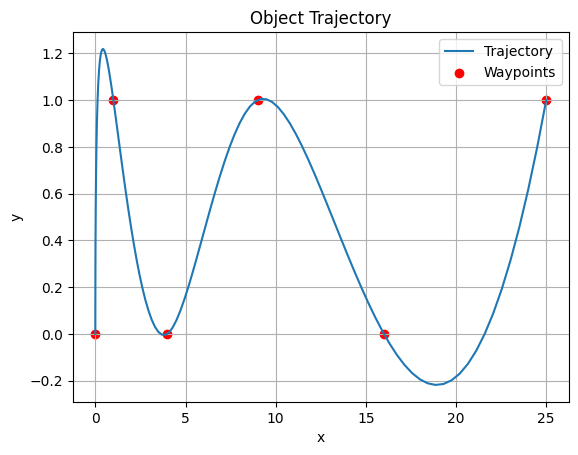

Object's location at t=2.5: (6.25, 0.5000000000000001)


In [19]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Define time points
t_points = np.array([0, 1, 2, 3, 4, 5])

# Define x and y coordinates at these time points
x_points = np.array([0, 1, 4, 9, 16, 25])
y_points = np.array([0, 1, 0, 1, 0, 1])

# Create cubic splines for x and y coordinates
spline_x = CubicSpline(t_points, x_points)
spline_y = CubicSpline(t_points, y_points)

# Evaluate the splines at a fine grid of time points
t_fine = np.linspace(0, 5, 100)
x_fine = spline_x(t_fine)
y_fine = spline_y(t_fine)

# Plot the trajectory
plt.plot(x_fine, y_fine, label='Trajectory')
plt.scatter(x_points, y_points, color='red', label='Waypoints')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Object Trajectory')
plt.legend()
plt.grid(True)
plt.show()

# Example: Find the object's location at t = 2.5
t_eval = 2.5
x_location = spline_x(t_eval)
y_location = spline_y(t_eval)
print(f"Object's location at t={t_eval}: ({x_location}, {y_location})")

In [92]:
import torch

# Define the objective function
def objective_function(x, y):
    return -(3 * x + 4 * y)  # Negative because PyTorch minimizes by default

# Define the constraints
def constraints(x, y):
    return [
        x + 2 * y - 14,  # x + 2y <= 14
        y - 3 * x,       # y <= 3x
        x - y - 2        # x - y <= 2
    ]

# Initialize decision variables
x = torch.tensor(0.01, requires_grad=True)
y = torch.tensor(0.01, requires_grad=True)

# Define an optimizer
optimizer = torch.optim.Adam([x, y], lr=0.1)

# Optimization loop
for _ in range(200):
    optimizer.zero_grad()  # Clear previous gradients
    loss = objective_function(x, y)  # Compute the objective
    penalty = sum(torch.relu(c)**2 for c in constraints(x, y))  # Penalty for constraint violations
    total_loss = loss + 30*penalty  # Combine loss and penalty
    total_loss.backward()  # Compute gradients
    optimizer.step()  # Update decision variables

    # Debugging: Print intermediate values
    if _ % 1000 == 0:
        print(f"Iteration {_}: x = {x.item()}, y = {y.item()}, loss = {loss.item()}, penalty = {penalty.item()}")

# Print the optimized decision variables and objective value
print(f'Optimized x: {x.item()}, y: {y.item()}')
print(f'Maximized objective value: {-objective_function(x, y).item()}')

# Check constraint satisfaction
for i, c in enumerate(constraints(x, y), 1):
    print(f"Constraint {i} value: {c.item()}")

Iteration 0: x = 0.10999999940395355, y = 0.10999998450279236, loss = -0.07000000029802322, penalty = 0.0
Optimized x: 6.01968240737915, y: 4.00963830947876
Maximized objective value: 34.09760284423828
Constraint 1 value: 0.038959503173828125
Constraint 2 value: -14.049409866333008
Constraint 3 value: 0.010044097900390625


In [98]:
import torch

# Initialize variables
x = torch.tensor(0.51, requires_grad=True)  # Approximate binary variable
y = torch.tensor(1.0, requires_grad=True)  # Continuous variable
z = torch.tensor(0.0, requires_grad=True)  # Product variable

# Define an optimizer
optimizer = torch.optim.Adam([x, y, z], lr=0.01)

# Define a large constant M
M = 100

# Optimization loop
for _ in range(1000):
    optimizer.zero_grad()  # Clear previous gradients

    # Objective: Minimize z
    objective = z

    # Penalty terms to approximate binary behavior
    penalty_x = x * (1-x)  # Penalize x for deviating from binary values

    # Constraints to approximate z = x * y
    constraint1 = torch.relu(z - M * x)
    constraint2 = torch.relu(z - y)
    constraint3 = torch.relu(y - z - M * (1 - x))
    constraint4 = torch.relu(-z)

    # Total loss
    total_loss = objective + 1000 * (penalty_x + constraint1 + constraint2 + constraint3 + constraint4)

    # Backward pass
    total_loss.backward()

    # Update variables
    optimizer.step()

    # Print intermediate results
    if _ % 100 == 0:
        print(f"Iteration {_}: x = {x.item()}, y = {y.item()}, z = {z.item()}, loss = {total_loss.item()}")

# Print final results
print("Final values:")
print(f"x: {x.item()}")
print(f"y: {y.item()}")
print(f"z: {z.item()}")

Iteration 0: x = 0.5199999809265137, y = 1.0, z = -0.009999999776482582, loss = 249.89999389648438
Iteration 100: x = 0.9235587120056152, y = 0.8965927362442017, z = 0.1382218450307846, loss = 71.21855163574219
Iteration 200: x = 0.9458163380622864, y = 0.8408375382423401, z = 0.17601093649864197, loss = 49.535484313964844
Iteration 300: x = 0.9440104365348816, y = 0.7553204894065857, z = 0.23904435336589813, loss = 51.101436614990234
Iteration 400: x = 0.951638400554657, y = 0.6766500473022461, z = 0.2985839545726776, loss = 43.17837905883789
Iteration 500: x = 0.9689894318580627, y = 0.6059955954551697, z = 0.35234957933425903, loss = 24.901199340820312
Iteration 600: x = 0.9973340034484863, y = 0.5451774001121521, z = 0.39793434739112854, loss = 4.060628890991211
Iteration 700: x = 0.9933299422264099, y = 0.5401402711868286, z = 0.39318692684173584, loss = 8.005195617675781
Iteration 800: x = 0.9888243079185486, y = 0.5364014506340027, z = 0.38793474435806274, loss = 12.405916213989

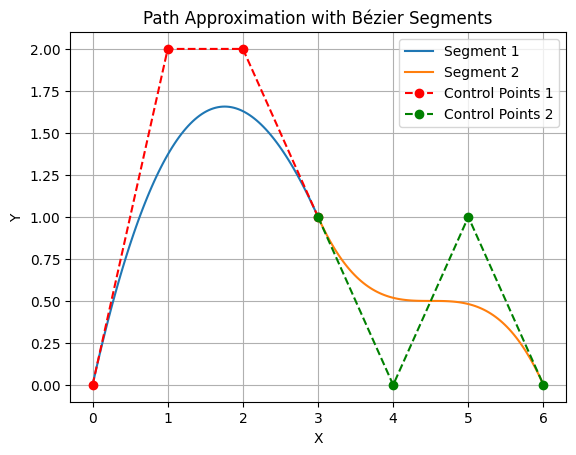

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to compute a Bézier curve
def bezier_curve(t, control_points):
    n = len(control_points) - 1
    curve = np.zeros((len(t), 2))  # Initialize a 2D array for the curve
    for i in range(n + 1):
        # Compute the Bernstein polynomial for each control point
        bernstein_poly = comb(n, i) * (1 - t)**(n - i) * t**i
        # Add the contribution of each control point to the curve
        curve += np.outer(bernstein_poly, control_points[i])
    return curve

# Define control points for two Bézier segments
control_points1 = np.array([[0, 0], [1, 2], [2, 2], [3, 1]])
control_points2 = np.array([[3, 1], [4, 0], [5, 1], [6, 0]])

# Time vector
t = np.linspace(0, 1, 100)

# Compute the Bézier curves for each segment
curve1 = bezier_curve(t, control_points1)
curve2 = bezier_curve(t, control_points2)

# Plot the results
plt.plot(curve1[:, 0], curve1[:, 1], label='Segment 1')
plt.plot(curve2[:, 0], curve2[:, 1], label='Segment 2')
plt.plot(control_points1[:, 0], control_points1[:, 1], 'ro--', label='Control Points 1')
plt.plot(control_points2[:, 0], control_points2[:, 1], 'go--', label='Control Points 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Path Approximation with Bézier Segments')
plt.legend()
plt.grid()
plt.show()

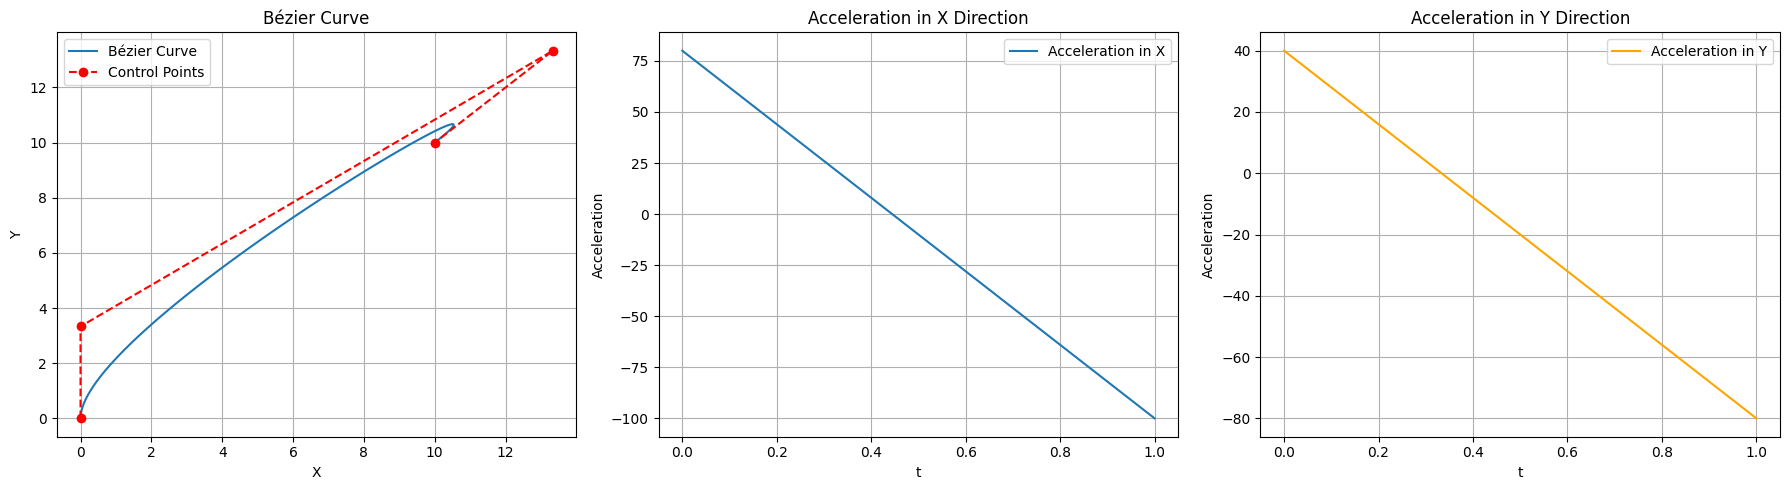

In [116]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Function to compute a cubic Bézier curve and its acceleration using PyTorch
def bezier_curve_and_acceleration(t, control_points):
    P0, P1, P2, P3 = control_points
    C = ((1-t)**3) * P0 + 3 * ((1-t)**2) * t * P1 + 3 * (1-t) * (t**2) * P2 + (t**3) * P3
    A = 6 * (1-t) * (P2 - 2*P1 + P0) + 6 * t * (P3 - 2*P2 + P1)
    return C, A

# Define start and end control points
P0 = torch.tensor([0.0, 0.0], requires_grad=False)
P3 = torch.tensor([10.0, 10.0], requires_grad=False)

# Desired initial and final velocities
v_initial_desired = torch.tensor([0.0, 10.0])
v_final_desired = torch.tensor([-10.0,-10.0])

# Calculate P1 and P2 to set the initial and final velocities
P1 = P0 + v_initial_desired / 3
P2 = P3 - v_final_desired / 3

# Time vector
t = torch.linspace(0, 1, 100).unsqueeze(1)  # Shape: (100, 1)

# Compute the Bézier curve and its acceleration
control_points = [P0, P1, P2, P3]
curve, acceleration = bezier_curve_and_acceleration(t, control_points)
curve = curve.detach().numpy()
acceleration = acceleration.detach().numpy()

# Plot the Bézier curve and acceleration components
plt.figure(figsize=(18, 5))

# Plot the Bézier curve
plt.subplot(1, 3, 1)
plt.plot(curve[:, 0], curve[:, 1], label='Bézier Curve')
plt.plot(*zip(*[P0.numpy(), P1.numpy(), P2.numpy(), P3.numpy()]), 'ro--', label='Control Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bézier Curve')
plt.grid(True)
plt.legend()

# Plot the acceleration in X direction
plt.subplot(1, 3, 2)
plt.plot(t.numpy(), acceleration[:, 0], label='Acceleration in X')
plt.xlabel('t')
plt.ylabel('Acceleration')
plt.title('Acceleration in X Direction')
plt.grid(True)
plt.legend()

# Plot the acceleration in Y direction
plt.subplot(1, 3, 3)
plt.plot(t.numpy(), acceleration[:, 1], label='Acceleration in Y', color='orange')
plt.xlabel('t')
plt.ylabel('Acceleration')
plt.title('Acceleration in Y Direction')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to compute a Bézier curve
def bezier_curve(t, control_points):
    n = len(control_points) - 1
    curve = np.zeros((len(t), 2))  # Initialize a 2D array for the curve
    for i in range(n + 1):
        # Compute the Bernstein polynomial for each control point
        bernstein_poly = comb(n, i) * (1 - t)**(n - i) * t**i
        # Add the contribution of each control point to the curve
        curve += np.outer(bernstein_poly, control_points[i])
    return curve

# Define control points for two Bézier segments
control_points1 = np.array([[0, 0], [1, 2], [2, 2], [3, 1]])
control_points2 = np.array([[3, 1], [4, 0], [5, 1], [6, 0]])

# Time vector
t = np.linspace(0, 1, 100)

# Compute the Bézier curves for each segment
curve1 = bezier_curve(t, control_points1)
curve2 = bezier_curve(t, control_points2)

# Plot the results
plt.plot(curve1[:, 0], curve1[:, 1], label='Segment 1')
plt.plot(curve2[:, 0], curve2[:, 1], label='Segment 2')
plt.plot(control_points1[:, 0], control_points1[:, 1], 'ro--', label='Control Points 1')
plt.plot(control_points2[:, 0], control_points2[:, 1], 'go--', label='Control Points 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Path Approximation with Bézier Segments')
plt.legend()
plt.grid()
plt.show()

[array([0., 0.], dtype=float32),
 array([ 3.3325961e+00, -2.4601557e-05], dtype=float32),
 array([ 6.6674051e+00, -2.3054177e-05], dtype=float32),
 array([10.,  0.], dtype=float32)]

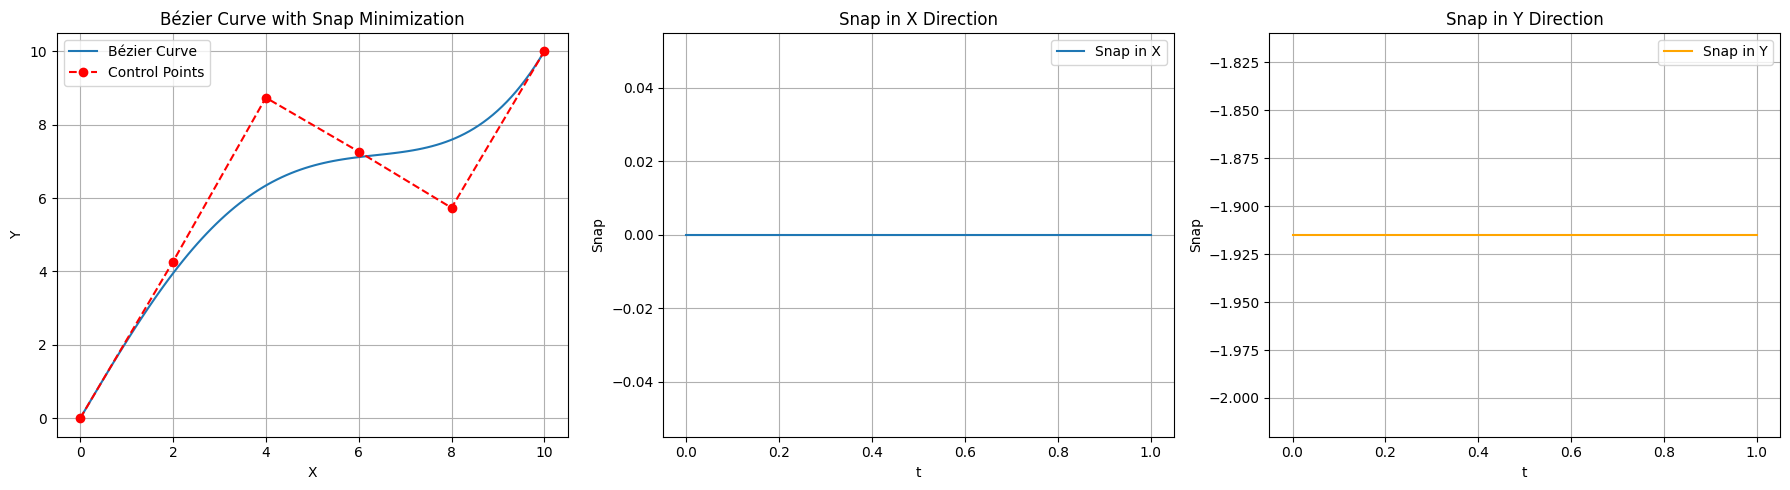


Maximum and Minimum Values:
--------------------------------------------------

Position:
X: max = 10.00, min = 0.00
Y: max = 10.00, min = 0.00

Velocity:
X: max = 10.00, min = 10.00
Y: max = 21.35, min = 1.38

Acceleration:
X: max = 0.00, min = 0.00
Y: max = 115.94, min = -48.08

Jerk:
X: max = 0.00, min = 0.00
Y: max = 351.55, min = -368.45

Snap:
X: max = 0.00, min = 0.00
Y: max = -1.91, min = -1.91

Magnitude Maxima:
--------------------------------------------------
Maximum velocity magnitude: 23.58
Maximum acceleration magnitude: 115.94
Maximum jerk magnitude: 368.45
Maximum snap magnitude: 1.91


In [123]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def bezier_derivatives(t, control_points):
    P0, P1, P2, P3, P4, P5 = control_points
    # Position
    C = ((1-t)**5) * P0 + 5 * ((1-t)**4) * t * P1 + 10 * ((1-t)**3) * (t**2) * P2 + 10 * ((1-t)**2) * (t**3) * P3 + 5 * (1-t) * (t**4) * P4 + (t**5) * P5
    
    # Velocity (first derivative)
    V = 5 * ((1-t)**4) * (P1 - P0) + 20 * ((1-t)**3) * t * (P2 - P1) + 30 * ((1-t)**2) * (t**2) * (P3 - P2) + 20 * (1-t) * (t**3) * (P4 - P3) + 5 * (t**4) * (P5 - P4)
    
    # Acceleration (second derivative)
    A = 20 * ((1-t)**3) * (P2 - 2*P1 + P0) + 60 * ((1-t)**2) * t * (P3 - 2*P2 + P1) + 60 * (1-t) * (t**2) * (P4 - 2*P3 + P2) + 20 * (t**3) * (P5 - 2*P4 + P3)
    
    # Jerk (third derivative)
    J = 60 * ((1-t)**2) * (P3 - 3*P2 + 3*P1 - P0) + 120 * (1-t) * t * (P4 - 3*P3 + 3*P2 - P1) + 60 * (t**2) * (P5 - 3*P4 + 3*P3 - P2)
    
    # Snap (fourth derivative)
    S = 120 * ((1-t) * (P5 - 4*P4 + 6*P3 - 4*P2 + P1) + t * (P5 - 4*P4 + 6*P3 - 4*P2 + P1))
    
    return C, V, A, J, S

# Function to compute a quintic Bézier curve and its snap using PyTorch
def bezier_curve_and_snap(t, control_points):
    P0, P1, P2, P3, P4, P5 = control_points
    # Position
    C = ((1-t)**5) * P0 + 5 * ((1-t)**4) * t * P1 + 10 * ((1-t)**3) * (t**2) * P2 + 10 * ((1-t)**2) * (t**3) * P3 + 5 * (1-t) * (t**4) * P4 + (t**5) * P5
    # Snap (fourth derivative)
    S = 120 * ((1-t) * (P5 - 4*P4 + 6*P3 - 4*P2 + P1) + t * (P5 - 4*P4 + 6*P3 - 4*P2 + P1))
    return C, S

# Objective function to minimize snap
def snap_objective(control_points, t):
    _, snap = bezier_curve_and_snap(t, control_points)
    return torch.sum(torch.norm(snap, dim=1))

# Define start and end control points
P0 = torch.tensor([0.0, 0.0], requires_grad=False)
P5 = torch.tensor([10.0, 10.0], requires_grad=False)

# Initial guess for the middle control points
P1 = torch.tensor([2.0, 5.0], requires_grad=True)
P2 = torch.tensor([4.0, 8.0], requires_grad=True)
P3 = torch.tensor([6.0, 8.0], requires_grad=True)
P4 = torch.tensor([8.0, 5.0], requires_grad=True)

# Time vector
t = torch.linspace(0, 1, 100).unsqueeze(1)  # Shape: (100, 1)

# Optimizer
optimizer = torch.optim.Adam([P1, P2, P3, P4], lr=0.01)

# Optimization loop
for _ in range(1000):
    optimizer.zero_grad()
    control_points = [P0, P1, P2, P3, P4, P5]
    loss = snap_objective(control_points, t)
    loss.backward()
    optimizer.step()

# Extract optimized control points
optimized_control_points = [P0.detach().numpy(), P1.detach().numpy(), P2.detach().numpy(), P3.detach().numpy(), P4.detach().numpy(), P5.detach().numpy()]

# Compute the optimized Bézier curve
curve, snap = bezier_curve_and_snap(t, [P0, P1, P2, P3, P4, P5])
curve = curve.detach().numpy()
snap = snap.detach().numpy()

curve, velocity, acceleration, jerk, snap = bezier_derivatives(t, [P0, P1, P2, P3, P4, P5])
curve = curve.detach().numpy()
velocity = velocity.detach().numpy()
acceleration = acceleration.detach().numpy()
jerk = jerk.detach().numpy()
snap = snap.detach().numpy()

# Plot the Bézier curve and snap components
plt.figure(figsize=(18, 5))

# Plot the Bézier curve
plt.subplot(1, 3, 1)
plt.plot(curve[:, 0], curve[:, 1], label='Bézier Curve')
plt.plot(*zip(*optimized_control_points), 'ro--', label='Control Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bézier Curve with Snap Minimization')
plt.grid(True)
plt.legend()

# Plot the snap in X direction
plt.subplot(1, 3, 2)
plt.plot(t.numpy(), snap[:, 0], label='Snap in X')
plt.xlabel('t')
plt.ylabel('Snap')
plt.title('Snap in X Direction')
plt.grid(True)
plt.legend()

# Plot the snap in Y direction
plt.subplot(1, 3, 3)
plt.plot(t.numpy(), snap[:, 1], label='Snap in Y', color='orange')
plt.xlabel('t')
plt.ylabel('Snap')
plt.title('Snap in Y Direction')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# After plotting, print all maxima and minima
print("\nMaximum and Minimum Values:")
print("-" * 50)

print("\nPosition:")
print(f"X: max = {curve[:, 0].max():.2f}, min = {curve[:, 0].min():.2f}")
print(f"Y: max = {curve[:, 1].max():.2f}, min = {curve[:, 1].min():.2f}")

print("\nVelocity:")
print(f"X: max = {velocity[:, 0].max():.2f}, min = {velocity[:, 0].min():.2f}")
print(f"Y: max = {velocity[:, 1].max():.2f}, min = {velocity[:, 1].min():.2f}")

print("\nAcceleration:")
print(f"X: max = {acceleration[:, 0].max():.2f}, min = {acceleration[:, 0].min():.2f}")
print(f"Y: max = {acceleration[:, 1].max():.2f}, min = {acceleration[:, 1].min():.2f}")

print("\nJerk:")
print(f"X: max = {jerk[:, 0].max():.2f}, min = {jerk[:, 0].min():.2f}")
print(f"Y: max = {jerk[:, 1].max():.2f}, min = {jerk[:, 1].min():.2f}")

print("\nSnap:")
print(f"X: max = {snap[:, 0].max():.2f}, min = {snap[:, 0].min():.2f}")
print(f"Y: max = {snap[:, 1].max():.2f}, min = {snap[:, 1].min():.2f}")

# Print magnitudes
print("\nMagnitude Maxima:")
print("-" * 50)
print(f"Maximum velocity magnitude: {np.max(np.linalg.norm(velocity, axis=1)):.2f}")
print(f"Maximum acceleration magnitude: {np.max(np.linalg.norm(acceleration, axis=1)):.2f}")
print(f"Maximum jerk magnitude: {np.max(np.linalg.norm(jerk, axis=1)):.2f}")
print(f"Maximum snap magnitude: {np.max(np.linalg.norm(snap, axis=1)):.2f}")

In [125]:
print(f"P0: {P0.detach().numpy()}")
print(f"P1: {P1.detach().numpy()}")
print(f"P2: {P2.detach().numpy()}")
print(f"P3: {P3.detach().numpy()}")
print(f"P4: {P4.detach().numpy()}")
print(f"P5: {P5.detach().numpy()}")

P0: [0. 0.]
P1: [2.        4.2656035]
P2: [4.       8.734399]
P3: [6.        7.2656035]
P4: [8.        5.7343965]
P5: [10. 10.]



Energy Components:
--------------------------------------------------
Segment 0: 656.79
Segment 1: 7685.43
Segment 2: 5040.07
Segment 3: 2277.52
Segment 4: 532.02
Total Energy: 16191.83


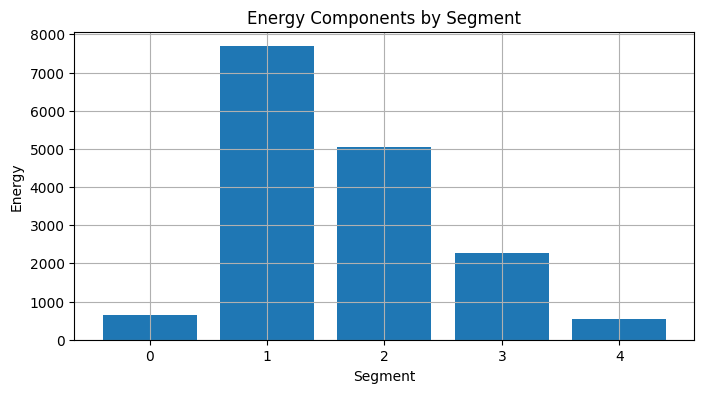

In [126]:
# Add this function to compute energy
def compute_energy(control_points):
    P0, P1, P2, P3, P4, P5 = control_points
    energy = (
        25 * torch.norm(P1 - P0)**2 +    # 5^2
        400 * torch.norm(P2 - P1)**2 +   # 20^2
        900 * torch.norm(P3 - P2)**2 +   # 30^2
        400 * torch.norm(P4 - P3)**2 +   # 20^2
        25 * torch.norm(P5 - P4)**2      # 5^2
    )
    return energy

# Modified objective function to include both snap and energy
def combined_objective(control_points, t, snap_weight=1.0, energy_weight=0.1):
    # Snap component
    _, snap = bezier_curve_and_snap(t, control_points)
    snap_loss = torch.sum(torch.norm(snap, dim=1))
    
    # Energy component
    energy_loss = compute_energy(control_points)
    
    return snap_weight * snap_loss + energy_weight * energy_loss

# Modify the optimization loop to use the combined objective
optimizer = torch.optim.Adam([P1, P2, P3, P4], lr=0.01)

# Optimization loop
for _ in range(1000):
    optimizer.zero_grad()
    control_points = [P0, P1, P2, P3, P4, P5]
    loss = combined_objective(control_points, t, snap_weight=1.0, energy_weight=0.1)
    loss.backward()
    optimizer.step()

# Add energy calculation to the final prints
print("\nEnergy Components:")
print("-" * 50)
P0, P1, P2, P3, P4, P5 = [P0, P1, P2, P3, P4, P5]
energy_components = [
    25 * torch.norm(P1 - P0)**2,
    400 * torch.norm(P2 - P1)**2,
    900 * torch.norm(P3 - P2)**2,
    400 * torch.norm(P4 - P3)**2,
    25 * torch.norm(P5 - P4)**2
]
for i, energy in enumerate(energy_components):
    print(f"Segment {i}: {energy.item():.2f}")
print(f"Total Energy: {sum(energy_components).item():.2f}")

# Add an additional plot for energy components
plt.figure(figsize=(8, 4))
plt.bar(range(5), [e.item() for e in energy_components])
plt.title('Energy Components by Segment')
plt.xlabel('Segment')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

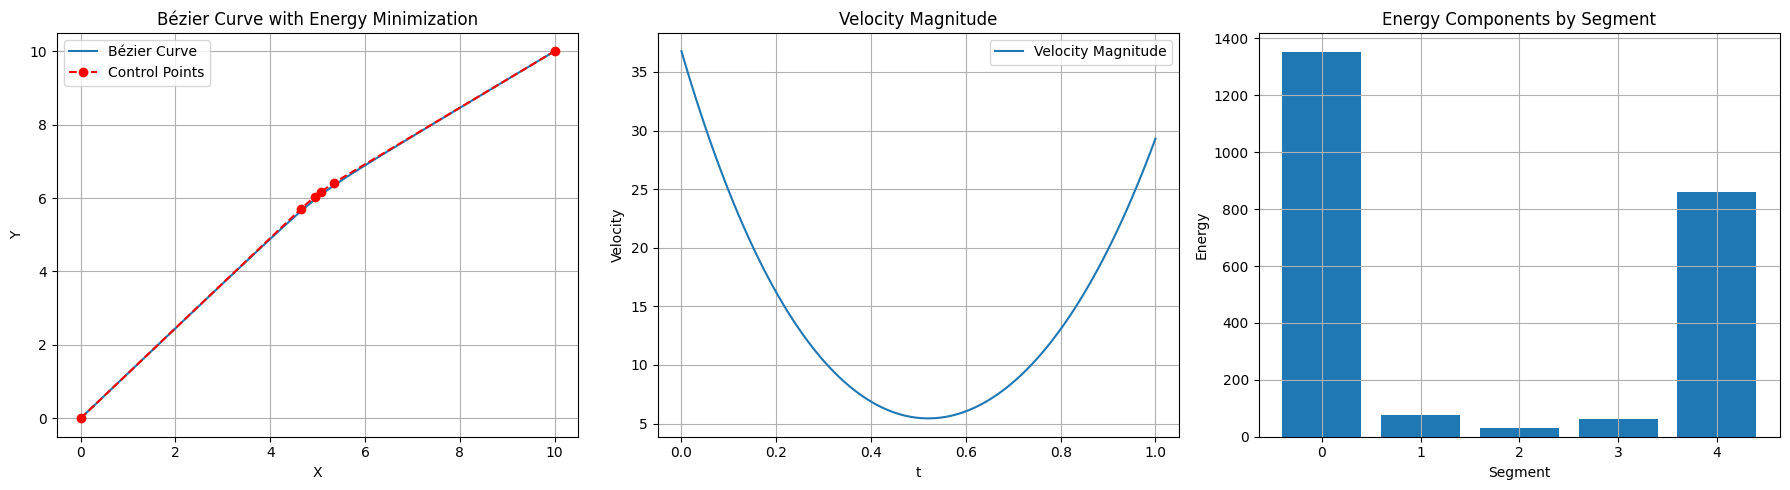


Maximum and Minimum Values:
--------------------------------------------------

Position:
X: max = 10.00, min = 0.00
Y: max = 10.00, min = 0.00

Velocity:
X: max = 23.23, min = 3.87
Y: max = 28.51, min = 3.77

Acceleration:
X: max = 87.10, min = -87.10
Y: max = 66.30, min = -107.44

Jerk:
X: max = 251.61, min = 135.49
Y: max = 310.41, min = 127.53

Snap:
X: max = 464.50, min = 464.50
Y: max = 342.72, min = 342.72

Magnitude Maxima:
--------------------------------------------------
Maximum velocity magnitude: 36.77
Maximum acceleration magnitude: 138.31
Maximum jerk magnitude: 399.58
Maximum snap magnitude: 577.25

Energy Components:
--------------------------------------------------
Segment 0: 1352.08
Segment 1: 77.16
Segment 2: 30.49
Segment 3: 61.08
Segment 4: 859.18
Total Energy: 2379.98


In [127]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def bezier_derivatives(t, control_points):
    P0, P1, P2, P3, P4, P5 = control_points
    # Position
    C = ((1-t)**5) * P0 + 5 * ((1-t)**4) * t * P1 + 10 * ((1-t)**3) * (t**2) * P2 + 10 * ((1-t)**2) * (t**3) * P3 + 5 * (1-t) * (t**4) * P4 + (t**5) * P5
    
    # Velocity (first derivative)
    V = 5 * ((1-t)**4) * (P1 - P0) + 20 * ((1-t)**3) * t * (P2 - P1) + 30 * ((1-t)**2) * (t**2) * (P3 - P2) + 20 * (1-t) * (t**3) * (P4 - P3) + 5 * (t**4) * (P5 - P4)
    
    # Acceleration (second derivative)
    A = 20 * ((1-t)**3) * (P2 - 2*P1 + P0) + 60 * ((1-t)**2) * t * (P3 - 2*P2 + P1) + 60 * (1-t) * (t**2) * (P4 - 2*P3 + P2) + 20 * (t**3) * (P5 - 2*P4 + P3)
    
    # Jerk (third derivative)
    J = 60 * ((1-t)**2) * (P3 - 3*P2 + 3*P1 - P0) + 120 * (1-t) * t * (P4 - 3*P3 + 3*P2 - P1) + 60 * (t**2) * (P5 - 3*P4 + 3*P3 - P2)
    
    # Snap (fourth derivative)
    S = 120 * ((1-t) * (P5 - 4*P4 + 6*P3 - 4*P2 + P1) + t * (P5 - 4*P4 + 6*P3 - 4*P2 + P1))
    
    return C, V, A, J, S

def compute_energy(control_points):
    P0, P1, P2, P3, P4, P5 = control_points
    energy = (
        25 * torch.norm(P1 - P0)**2 +    # 5^2
        400 * torch.norm(P2 - P1)**2 +   # 20^2
        900 * torch.norm(P3 - P2)**2 +   # 30^2
        400 * torch.norm(P4 - P3)**2 +   # 20^2
        25 * torch.norm(P5 - P4)**2      # 5^2
    )
    return energy

# Define start and end control points
P0 = torch.tensor([0.0, 0.0], requires_grad=False)
P5 = torch.tensor([10.0, 10.0], requires_grad=False)

# Initial guess for the middle control points
P1 = torch.tensor([2.0, 5.0], requires_grad=True)
P2 = torch.tensor([4.0, 8.0], requires_grad=True)
P3 = torch.tensor([6.0, 8.0], requires_grad=True)
P4 = torch.tensor([8.0, 5.0], requires_grad=True)

# Time vector
t = torch.linspace(0, 1, 100).unsqueeze(1)

# Optimizer
optimizer = torch.optim.Adam([P1, P2, P3, P4], lr=0.01)

# Optimization loop
for _ in range(1000):
    optimizer.zero_grad()
    control_points = [P0, P1, P2, P3, P4, P5]
    loss = compute_energy(control_points)
    loss.backward()
    optimizer.step()

# Extract optimized control points
optimized_control_points = [P0.detach().numpy(), P1.detach().numpy(), P2.detach().numpy(), 
                          P3.detach().numpy(), P4.detach().numpy(), P5.detach().numpy()]

# Compute final curves and derivatives
curve, velocity, acceleration, jerk, snap = bezier_derivatives(t, [P0, P1, P2, P3, P4, P5])
curve = curve.detach().numpy()
velocity = velocity.detach().numpy()
acceleration = acceleration.detach().numpy()
jerk = jerk.detach().numpy()
snap = snap.detach().numpy()

# Plot results
plt.figure(figsize=(18, 5))

# Plot the Bézier curve
plt.subplot(1, 3, 1)
plt.plot(curve[:, 0], curve[:, 1], label='Bézier Curve')
plt.plot(*zip(*optimized_control_points), 'ro--', label='Control Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bézier Curve with Energy Minimization')
plt.grid(True)
plt.legend()

# Plot velocity magnitude
plt.subplot(1, 3, 2)
velocity_magnitude = np.linalg.norm(velocity, axis=1)
plt.plot(t.numpy(), velocity_magnitude, label='Velocity Magnitude')
plt.xlabel('t')
plt.ylabel('Velocity')
plt.title('Velocity Magnitude')
plt.grid(True)
plt.legend()

# Plot energy components
plt.subplot(1, 3, 3)
energy_components = [
    25 * np.linalg.norm(optimized_control_points[1] - optimized_control_points[0])**2,
    400 * np.linalg.norm(optimized_control_points[2] - optimized_control_points[1])**2,
    900 * np.linalg.norm(optimized_control_points[3] - optimized_control_points[2])**2,
    400 * np.linalg.norm(optimized_control_points[4] - optimized_control_points[3])**2,
    25 * np.linalg.norm(optimized_control_points[5] - optimized_control_points[4])**2
]
plt.bar(range(5), energy_components)
plt.title('Energy Components by Segment')
plt.xlabel('Segment')
plt.ylabel('Energy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistics
print("\nMaximum and Minimum Values:")
print("-" * 50)

print("\nPosition:")
print(f"X: max = {curve[:, 0].max():.2f}, min = {curve[:, 0].min():.2f}")
print(f"Y: max = {curve[:, 1].max():.2f}, min = {curve[:, 1].min():.2f}")

print("\nVelocity:")
print(f"X: max = {velocity[:, 0].max():.2f}, min = {velocity[:, 0].min():.2f}")
print(f"Y: max = {velocity[:, 1].max():.2f}, min = {velocity[:, 1].min():.2f}")

print("\nAcceleration:")
print(f"X: max = {acceleration[:, 0].max():.2f}, min = {acceleration[:, 0].min():.2f}")
print(f"Y: max = {acceleration[:, 1].max():.2f}, min = {acceleration[:, 1].min():.2f}")

print("\nJerk:")
print(f"X: max = {jerk[:, 0].max():.2f}, min = {jerk[:, 0].min():.2f}")
print(f"Y: max = {jerk[:, 1].max():.2f}, min = {jerk[:, 1].min():.2f}")

print("\nSnap:")
print(f"X: max = {snap[:, 0].max():.2f}, min = {snap[:, 0].min():.2f}")
print(f"Y: max = {snap[:, 1].max():.2f}, min = {snap[:, 1].min():.2f}")

print("\nMagnitude Maxima:")
print("-" * 50)
print(f"Maximum velocity magnitude: {np.max(np.linalg.norm(velocity, axis=1)):.2f}")
print(f"Maximum acceleration magnitude: {np.max(np.linalg.norm(acceleration, axis=1)):.2f}")
print(f"Maximum jerk magnitude: {np.max(np.linalg.norm(jerk, axis=1)):.2f}")
print(f"Maximum snap magnitude: {np.max(np.linalg.norm(snap, axis=1)):.2f}")

print("\nEnergy Components:")
print("-" * 50)
for i, energy in enumerate(energy_components):
    print(f"Segment {i}: {energy:.2f}")
print(f"Total Energy: {sum(energy_components):.2f}")